<a href="https://colab.research.google.com/github/dominiksakic/zero_to_hero/blob/main/backpropagation_explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple start


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Function to explain Backpropagation
def f(x):
  """
  6x^2 - 10
  """
  return 2*x**3 - 10*x + 3

f(3.0)

27.0

- What is the derivate of this function at any given point?

  - What is the derivate telling me about the function?
  - Derivate: if I have a value a and increase it by h, how much does the function change?
  - This change is the slope of the function. And if it is positive it goes up, if it is positive it goes down!

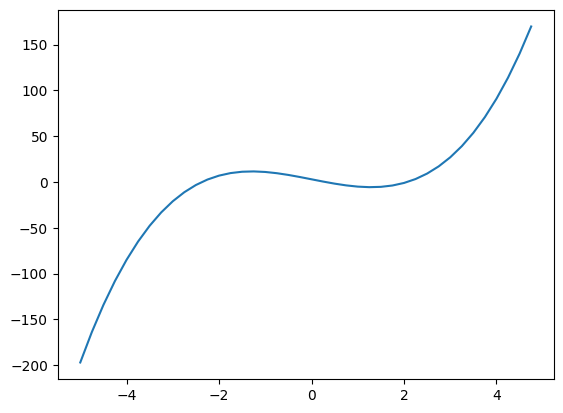

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

- For the above function, looking at any value in bigger than 2 for x, I would expect the Derivate to be positive!
- Lets test it!

In [ ]:
def derivate (x, h):
  """
  Dividing by h gives you the rate of change.
  f(x + h) - f(x) --> Difference between to points.
  /h --> Rate of change, which is the comparision between two things that
  change at the same time.

  The change of rate established a connection.
  """
  return (f(x + h) - f(x))/h

# Numerical approximation of the slope, h has to be close to 0 for better resutls
print(derivate(2, 0.001))
print(derivate(0, 0.001))
print(derivate(-4, 0.001))

14.012001999997636
-9.999998000000065
85.97600199999533


# Add complexity
- What are the derivate in terms of a, b, and c?

In [ ]:
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [ ]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
a += h
d2 = a * b + c
derivate = (d2 - d1)/h
# Increasing a decreses d, because you multiply b by a.
# b is negative here -> decrease.
print('d1, ', d1)
print('d2, ', d2)
print('Slope ',  derivate)

d1,  4.0
d2,  3.999699999999999
Slope  -3.000000000010772


In [41]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), "+")
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), "*")
    return out

  def __sub__(self, other):
    out = Value(self.data - other.data, (self, other), "-")
    return out

In [58]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
# same as c = a + b
c = a.__add__(b)
c.label = 'c'

In [56]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f  }" % (n.label, n.data,), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

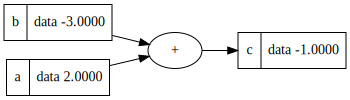

In [57]:
draw_dot(c)
